<a href="https://colab.research.google.com/github/makeredu/HighSchoolCourse/blob/main/K_%E8%BF%91%E9%84%B0%E6%BC%94%E7%AE%97%E6%B3%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 限時實作題2. 監督式學習：寶可夢的分類
## 2-0. 資料集讀取
 - 己有程式碼

## 2-1. 請完成基本/必要的資料內容和品質分析報告

 - 請自行完成[程式碼]+[分析報告]

## **2-2. 分類與迴歸決策樹 (C&RT)**
 - 己有程式碼，請說明其意義

## **2-3. K最近鄰 (KNN)**


##**[2-0] 先執行本區段程式把所附的寶可夢資料集(Pokemon_894_12.csv)載入Colab程式執行環境中**

In [1]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io

df = pd.read_csv(io.BytesIO(uploaded['Pokemon_894_12o.csv']))
print(df)

Saving Pokemon_894_12o.csv to Pokemon_894_12o.csv
     Number     Name     Type1   Type2  HP  Attack  Defense  SpecialAtk  \
0         1     妙蛙種子     Grass  Poison  45      49       49          65   
1         2      妙蛙草     Grass  Poison  60      62       63          80   
2         3      妙蛙花     Grass  Poison  80      82       83         100   
3         3  妙蛙花Mega     Grass  Poison  80     100      123         122   
4         4      小火龍      Fire     NaN  39      52       43          60   
..      ...      ...       ...     ...  ..     ...      ...         ...   
889     803      毒貝比    Poison     NaN  67      73       67          73   
890     804     四顎針龍    Poison  Dragon  73      73       73         127   
891     805      壘磊石      Rock   Steel  61     131      211          53   
892     806     砰頭小丑      Fire   Ghost  53     127       53         151   
893     807     捷拉奧拉  Electric     NaN  88     112       75         102   

     SpecialDef  Speed  Generation  Legendary  
0

## **[2-1] 請自行完成基本/必要的資料內容和品質分析報告**

In [ ]:
# 請於此處填入執行資料分析的程式碼

**[A] 請在此說明你分析後的結果**


<a id='sec2_2'></a>
## **[2-2] 決策樹分類與迴歸決策樹**

以下是以Scikit Learn提供之C&RT演算法所產生的分類決策樹，演算法的終止條件是由決策樹的層數來控制。請執行並做必要調整來決定你的分類決策樹(答案)。也非常鼓勵你改寫程式內容！

In [5]:
# 載入C&RT套件和資料集分割套件
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# 設定寶可夢 Type2欄位的「有值」或「無值」為分類的兩種類別(1, 0) 並以HP~Speed等6個欄位為特徵
df['hasType2'] = df['Type2'].notnull().astype(int) 
X, y = df.loc[:, 'HP':'Speed'], df['hasType2']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) #分割資料集

# 建立C&RT決策樹分類器
clf = DecisionTreeClassifier(max_depth=4) # max_depth為決策樹的層數
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report
# 產生分類效能評估報告
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.64      0.54        95
           1       0.63      0.44      0.52       129

    accuracy                           0.53       224
   macro avg       0.54      0.54      0.53       224
weighted avg       0.56      0.53      0.53       224



以上決策樹表的分類表現如何請說明？
以上決策樹的層數被控制在4層，請嘗試將決策樹的最大層數改為「3層」和「5層」，並比較三者的分類表現。

[***你的回答***] *請把你的回答寫在這個文字區塊*


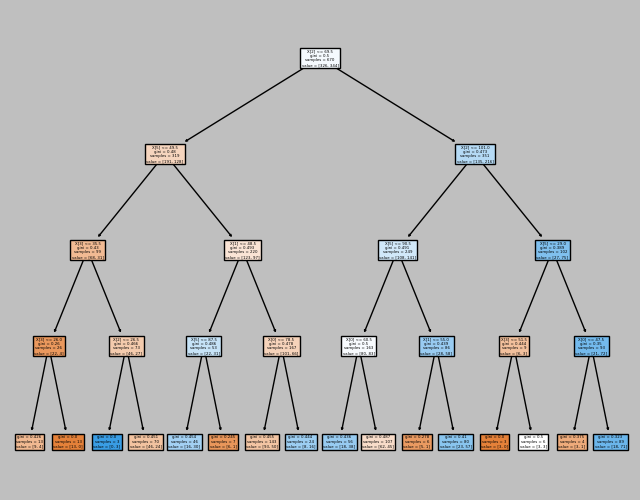

In [6]:
# 畫出你的決策樹(產生圖檔)
import matplotlib.pyplot as plt
plt.style.use('classic')
from sklearn.tree import plot_tree

plt.figure(dpi=100)
plot_tree(clf, filled=True);

請在本文字區塊說明你的決策樹(可產生有怎樣的決策規則?)

## **[2-3] K最近鄰 (KNN)**

以下是以Scikit Learn提供之KNN演算法的簡要設定所產生的分類器請做必要調整(也非常鼓勵你改寫程式內容+精進分類效果)，並執行你的KNN分類器。

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

# 特徵標準化
scale = StandardScaler().fit(X_train)
X_train_std = scale.transform(X_train)
# 建立最近鄰模型
neighbors = NearestNeighbors(n_neighbors=3).fit(X_train_std)

# 未知寶可夢的屬性
new_poke = [[120, 80, 80, 100, 150, 70]]


請將「未知寶可夢的屬性」(new_poke)的輸入方法改為手動(自行輸入6項能力值)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# 建立 KNN 分類器，預設 k=5
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train_std, y_train)
# 輸出預測結果
print(knn.predict(new_poke))
# 輸出預測結果的機率
print(knn.predict_proba(new_poke))

[1]
[[0.4 0.6]]


請說明以上KNN分類器的執行過程為何？ 以上分類器的k值設定為預設值5，請嘗試將k值改為「6層」和「7層」，並比較三者分類結果的差異。

[***你的回答***] *請把你的回答寫在這個文字區塊*